In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")


In [2]:
neu = pd.read_csv("./sentiment-assignment/neu.txt", header=None,delimiter="\t")

In [3]:
neu.columns = ['text']

In [4]:
pos = pd.read_csv("./sentiment-assignment/pos.txt", header=None,delimiter="\t")
pos.columns = ['text']

In [5]:
neg = pd.read_csv("./sentiment-assignment/neg.txt", header=None,delimiter="\t")
neg.columns = ['text']

In [6]:
neu['label'] = "neu"
pos['label'] = "pos"
neg['label'] = "neg"

In [7]:
df = neu.append(pos).append(neg)

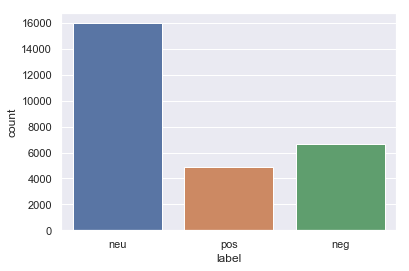

In [8]:
ax = sns.countplot(x="label", data=df)

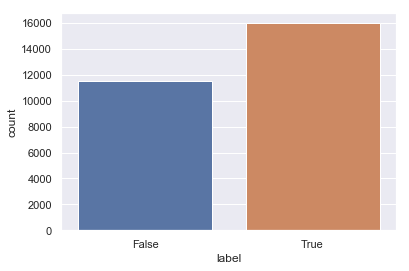

In [14]:
ax = sns.countplot(x=df['label'].apply(lambda x:x=="neu"))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


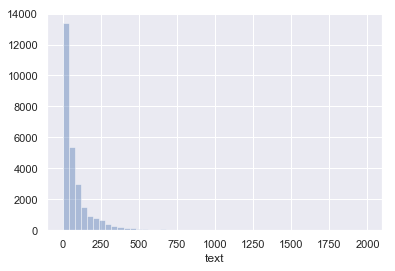

In [10]:
ax = sns.distplot(df['text'].apply(lambda x:len(x)),kde=False)

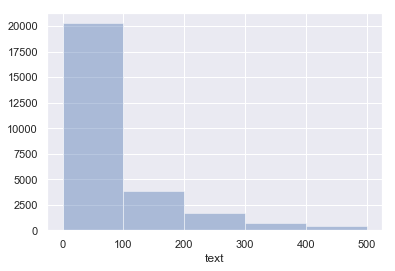

In [11]:
ax = sns.distplot(df['text'].apply(lambda x:len(x)),bins=[i for i in range(0,501,100)],kde=False)

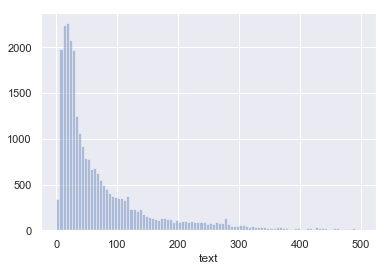

In [12]:
ax = sns.distplot(df['text'].apply(lambda x:len(x)),bins=[i for i in range(0,501,5)],kde=False)

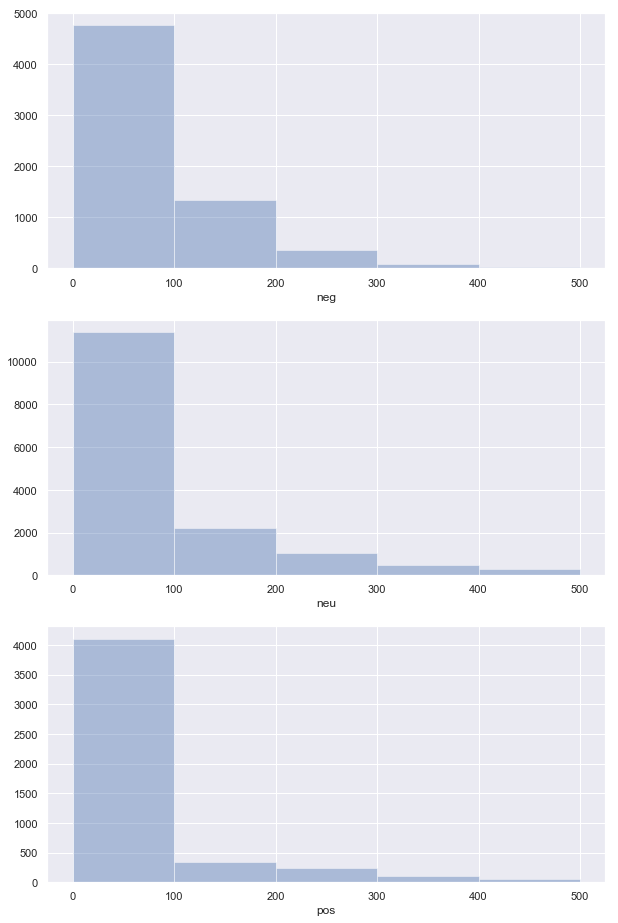

In [13]:
f, axs = plt.subplots(3, 1,figsize=(10,16))
sns.distplot(neg['text'].apply(lambda x:len(x)),bins=[i for i in range(0,501,100)],kde=False,ax=axs[0],axlabel="neg")
sns.distplot(neu['text'].apply(lambda x:len(x)),bins=[i for i in range(0,501,100)],kde=False,ax=axs[1],axlabel="neu")
sns.distplot(pos['text'].apply(lambda x:len(x)),bins=[i for i in range(0,501,100)],kde=False,ax=axs[2],axlabel="pos")

In [17]:
df = df.sample(frac=1).reset_index(drop=True)

In [19]:
df.to_csv("sentiment.tsv",sep='\t',index=None)